<a href="https://colab.research.google.com/github/khaloodi/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/LastSprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
np_load_old = np.load

In [0]:
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [4]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [8]:
len(word_index)

30979

In [9]:
# TODO - your code!
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

max_features = 2000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
# taking the first 80 chars will make the results converge faster, though the model can take variable size inputs
batch_size = 32
# relatively small batch size for RNN

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
# This is a pre-processing technique that chops X into 80 char chunks and turn them into time sequences


print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

W0823 17:23:02.268977 140125158094720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0823 17:23:02.307673 140125158094720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...


W0823 17:23:02.717160 140125158094720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/15
8982/8982 [==============================] - 73s 8ms/sample - loss: -230.9036 - acc: 0.0497 - val_loss: -375.7547 - val_acc: 0.0396
Epoch 2/15
8982/8982 [==============================] - 73s 8ms/sample - loss: -517.0079 - acc: 0.0499 - val_loss: -645.3472 - val_acc: 0.0396
Epoch 3/15
8982/8982 [==============================] - 73s 8ms/sample - loss: -788.4039 - acc: 0.0499 - val_loss: -911.7133 - val_acc: 0.0396
Epoch 4/15
8982/8982 [==============================] - 73s 8ms/sample - loss: -1058.4571 - acc: 0.0499 - val_loss: -1177.8327 - val_acc: 0.0396
Epoch 5/15
8982/8982 [==============================] - 73s 8ms/sample - loss: -1327.5569 - acc: 0.0499 - val_loss: -1443.5093 - val_acc: 0.0396
Epoch 6/15
8982/8982 [==============================] - 73s 8ms/sample - loss: -1596.1102 - acc: 0.0499 - val_loss: -1708.4803 - val_acc: 0.0396
Epoch 7/15
8982/8982 [==============================] - 73s 8ms/sample - loss: 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [10]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.2MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=37045815ba77db90e79f0d0adf0974c3f9be5b2cb72b7e5aa6911d21d7d4208b
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [11]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg

Errors: 0



In [0]:
from PIL import Image, ImageOps
import os
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from matplotlib.pyplot import imshow

In [13]:
# TODO - your code!

path = './downloads/animal pond/'

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

model = ResNet50(weights='imagenet')

def get_img_results(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    return results

files = []
results = {}

for file in os.listdir(path):
    filename= path+file
    files.append(filename)
    img = process_img_path(filename)
    results[filename] = get_img_results(img)
    
for key in results.keys():
    files.append(key)

W0823 17:41:44.014281 140125158094720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 17:41:44.018917 140125158094720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 17:41:44.034131 140125158094720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0823 17:41:44.080080 140125158094720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0823 17:41:44.081459

40960/35363 [==================================] - 0s 0us/step


In [0]:
def display_image(path):
    pil_im = Image.open(path)
    imshow(np.asarray(pil_im));

goldfish: 84.96%
eft: 6.76%
coho: 3.52%
common_newt: 2.0%
fiddler_crab: 0.79%


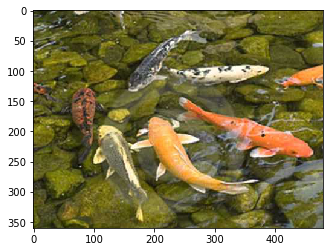

In [15]:
for pred in results[files[0]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[0])

mink: 30.98%
beaver: 23.4%
marmot: 20.8%
weasel: 9.19%
polecat: 7.37%


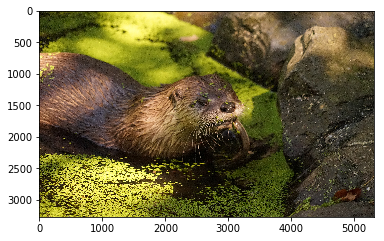

In [16]:
for pred in results[files[1]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[1])

handkerchief: 88.23%
bib: 2.27%
envelope: 2.01%
shower_curtain: 1.57%
web_site: 0.77%


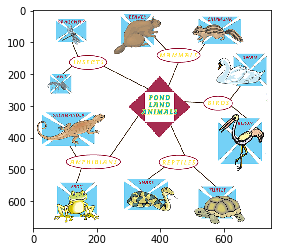

In [17]:
for pred in results[files[2]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[2])

slot: 87.12%
tray: 4.99%
pencil_box: 2.31%
envelope: 0.88%
handkerchief: 0.43%


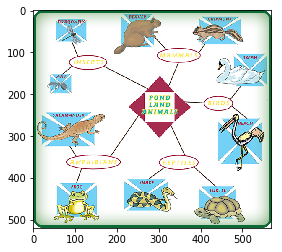

In [18]:
for pred in results[files[3]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[3])

jigsaw_puzzle: 86.8%
web_site: 6.41%
bib: 2.13%
comic_book: 1.57%
television: 0.54%


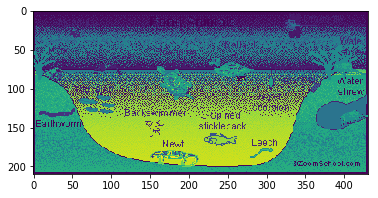

In [19]:
for pred in results[files[4]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[4])

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Autoencoders use an unsupervised learning approach where the image becomes the target label. One use case could potentially be removing noise from sound or image files

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Statistics and predictive modeling are my strong areas.


- What area of Data Science would you most like to learn more about, and why?

I would like to learn most about artificial neural networks and such because it is where the industry is leading.

- Where do you think Data Science will be in 5 years?

I believe data science will be at the forefront of tech companies and ideally general industries looking to keep up with current technologies. 

- What are the threats posed by AI to our society?

Automation and the lack of job opportunities for humans as they have been replaced by machines.

- How do you think we can counteract those threats? 

Developmental considerations allbeit potentially an inevitable threat.

- Do you think achieving General Artifical Intelligence is ever possible?

Yes, and I believe it is currently in existence across specific industries.

A few sentences per answer is fine - only elaborate if time allows.